Welcome to the <span style="color:purple">mudseries Post-processing</span> IPython Notebook 
-------------------------------

Please define the following inputs in the box below:
The configuration file set in **<span style="color:red">indir</span>** must have the following format and rows and be named **<span style="color:green">postproc_config.csv</span>**:

| Variable      | Description         | 
| :------------- |:---------------------|
| **<span style="color:blue">column</span>** | Column number (starting from 0) [see pre-processing results] |
| **<span style="color:blue">ExpDur</span>** | Experiment duration in hours |
| **<span style="color:blue">sample</span>** | Mud well-known name [ex: Delfzijl] |
| **<span style="color:blue">ColumnName</span>** | Column name used in the plots [ex: col_0] |
| **<span style="color:blue">Ci</span>** | Concentration-i [g/l] |
| **<span style="color:blue">Cg</span>** | Concentration-g [g/l] |
| **<span style="color:blue">H_ini</span>** | Initial water level of the settling column [meters] |
| **<span style="color:blue">Rho_s</span>** | Density of solids in [kg/m3] |
| **<span style="color:blue">Rho_w</span>** | Initial water content = mass of water / mass of dry material |
| **<span style="color:blue">SandFrac</span>** | Fraction of sand present in sample  |
| **<span style="color:blue">T1</span>** | Time point start of the first phase of consolidation |
| **<span style="color:blue">T2</span>** | Time point start of the second phase of consolidation |
| **<span style="color:blue">H_final</span>** | Final bed height in the experiment in meters  |
| **<span style="color:blue">pix2m</span>** | Pixels to meters conversion factor per column  |
| **<span style="color:blue">khm</span>** | Constant added to the measurement for calibration [in meters]  |

**Example**:

|Column|ExpDur|SampleName|ColumnName|Ci|Cg|H_ini|Rho_s|Rho_w|SandFrac|T1|T2|H_finalbed|pix2m|khm
|:---- |:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----
|0|25| Delfzijl|col_0|50|60|0.4|2540|1008|0.1|2200|50000|0.074|0.0005|0.01


**Algorithm**:
- From a given set of results from mudseries.py [mudlevel, time] csv's read from **<span style="color:red">indir</span>** directory
- LogLog Plot time vs height + Outliers detection
- Show plot + Selection of initial land final point of linear region of loglog plot.
- Fitting of the equation (merckelbach) in the linear loglog part.

**Outputs** [inside the folder defined in **<span style="color:red">outdir</span>**]:
- Save output of fitting: Kk and nf (or D).
- Linear trend indicators
- Store all choices from raw data to final result in text file: initial concentration, sand fraction, manual selection of points
- Settling phase Dankers equation


In [1]:
import os
from postprocessing_Master import Master
import pandas as pd
from qgrid import QGridWidget
import matplotlib.pyplot as plt

# Please fill this input values [explanation above]
indir = "D:\sala\Documents\mudseries\IMAGES\CHATTAM_IMAGES\preprocess"
outdir = "D:\sala\Documents\mudseries\IMAGES\CHATTAM_IMAGES\postprocess"

# Color map for the plots
cmap = ['sienna', 'darkviolet', 'green', 'darkorange', 'magenta', 'gold', 'limegreen',
        'blue', 'darkgray', 'pink', 'cyan', 'purple']  # every column one colour [red is forbidden]


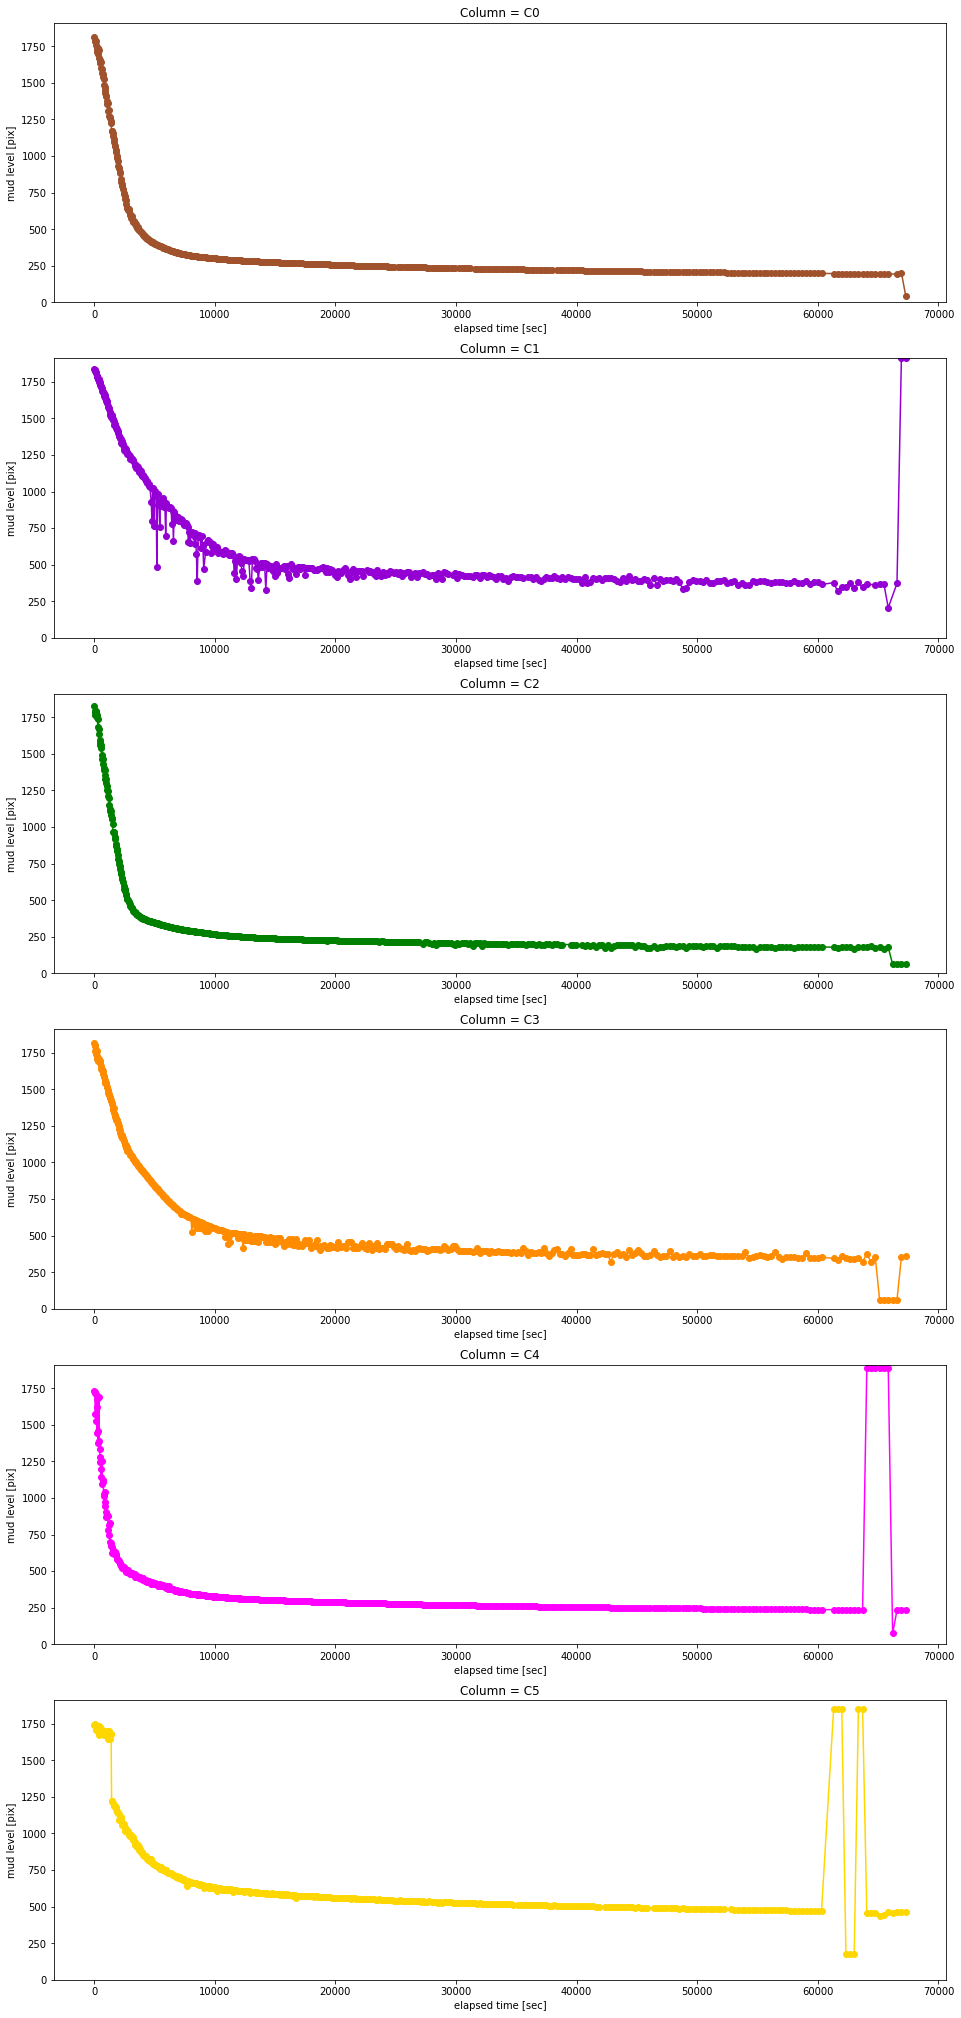

In [2]:
# Re-filtering [to avoid launching pre-processing again]
# EDIT %% mudseries_config.txt inside the main directory with the images %%
from mudseries import Mudseries
m = Mudseries(os.path.abspath(os.path.join(indir, os.pardir)))
m.read_config()
incsv = os.path.join(indir, 'columns_unfiltered.csv')
m.filter_outliers(incsv)
m.preview_plots()

In [3]:
# Read default values for post-processing and EDIT if needed [changes will be saved in the next step]
config_file = os.path.join(indir, 'postproc_config.csv')
df = pd.read_csv(config_file, delimiter=";")
qgrid_widget = QGridWidget(df=df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'enableTextSelectionOnCells': True, 'editable': True, 'explicitInitialization': True, 'minVisibleRows': 8, 'enableColumnReorder': False, 'defaultColumnWidth': 150, 'maxVisibleRows': 15, 'fullWidthRows': True, 'rowHeight': 28, 'autoEdit': False, 'syncColumnCellResize': True, 'forceFitColumns': True}, precision=5, show_toolbar=True)

In [4]:
# Save changes made in the table
df = qgrid_widget.get_changed_df()
df.to_csv(config_file, sep=";", index=False)

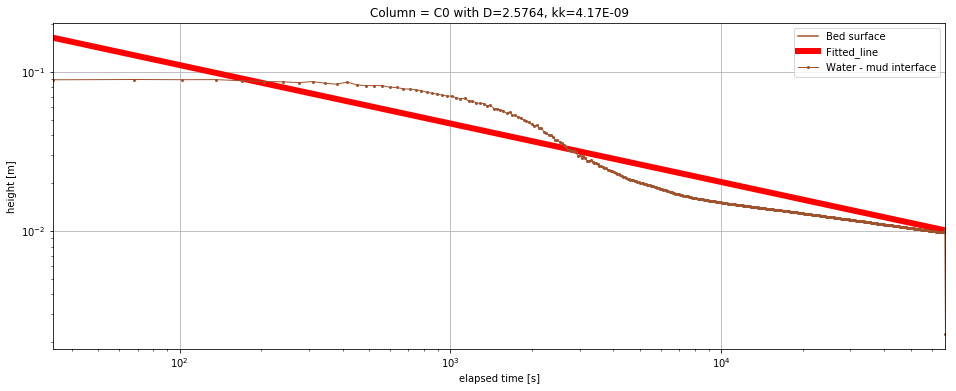

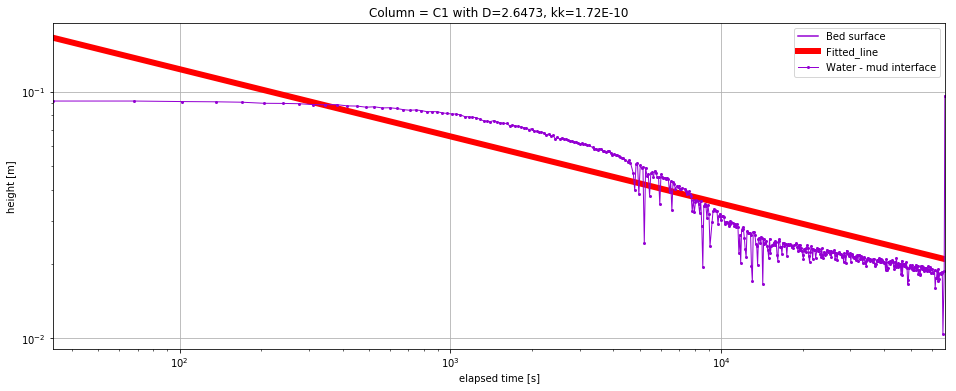

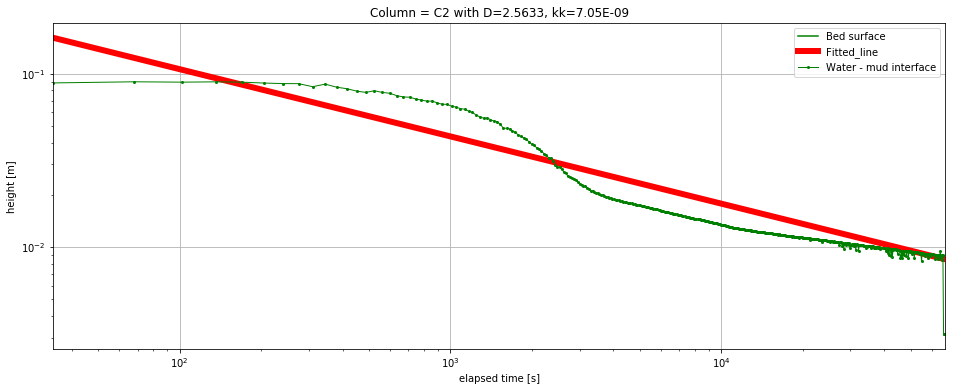

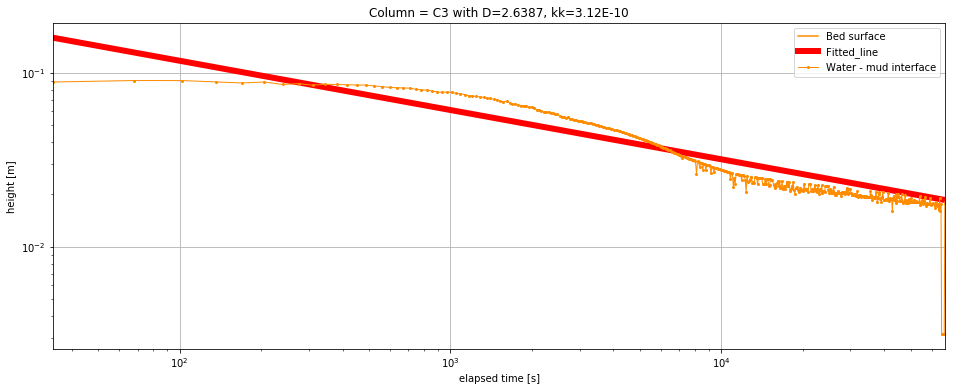

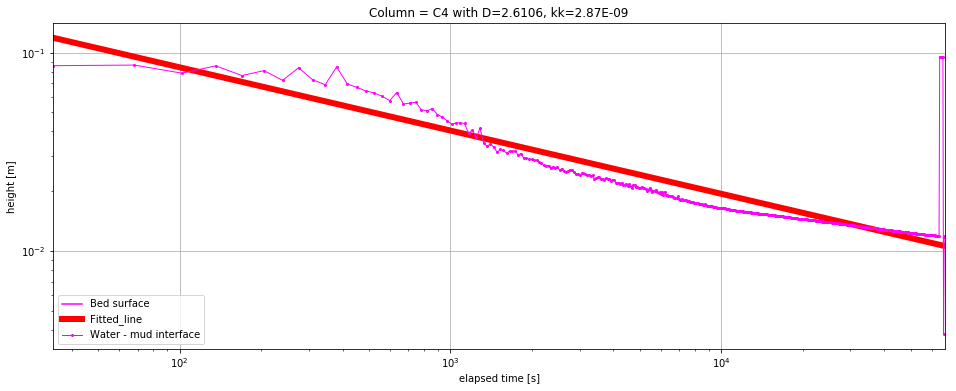

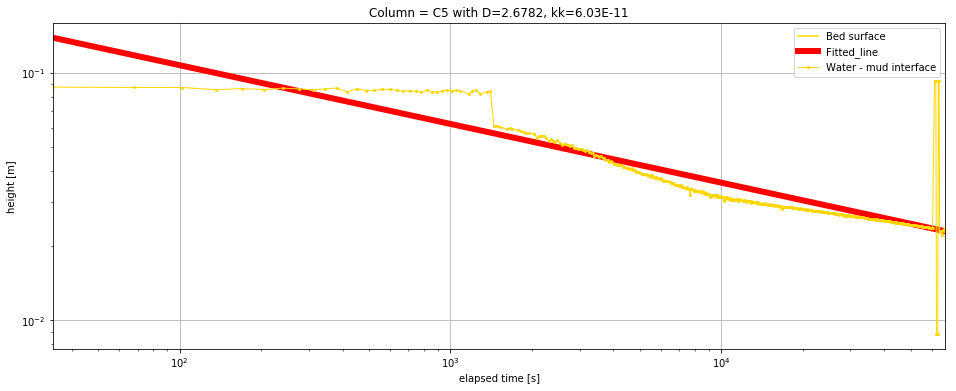

In [5]:
%matplotlib inline

# Fit and plot [post-processing]
results = os.path.join(indir, 'columns.csv')
config = pd.read_csv(config_file, delimiter=";")
pre_result = pd.read_csv(results, delimiter=";")
predata = pre_result.column.unique()

# For every column
for i, column in enumerate(predata):

    # Slice 
    colconf = config[config.column == i].iloc[0]
    colresult = pre_result[pre_result.column == i]

    # CsvName ExpDur SampleName ColumnName Ci Cg H_ini Rho_s Rho_w SandFrac T1 T2 H_finalbed
    m = Master(colresult, colconf, outdir, i, color=cmap[i])
    m.get_xydata_phaseI()
    #m.timewindow()
    m.cal_n_kk()
    m.plot_fitted_line_phaseI()
